# Hough Transform 

### <i> The Hough Transform algorithm is based on the following assumptions:

The Hough Transform is a Popular technique to detect any shape, if you can represent that shape in a mathematical form, It can detect the shape even if it is broken or distorted a little bit.

-> Lines in an image can be represented by their equation in polar coordinates, which is given by: r =  x cosΘ + y sinΘ =, where (r, theta) are the parameters of the line, and (x, y) are the coordinates of a point on the line

-> A point in an image corresponds to a sinusoidal curve in the parameter space

-> The intersection of curves in the parameter space corresponds to a line in the image.
</i>


---
#### <i><b> Hough Transformation Algorithm </i></b>

1. Edge detection, e.g Using the Canny Edge Detector.
2. Mapping of the edge points to the Hough space and storage in an accumulator
3. Interpretation of the accumulator to yield lines of infinite length. The interpretation is done by thresholding and possibly other constraints.
4. Conversion of infinite lines to finite lines.

---
OpenCV's Two kinds of Hough line Transforms:

o The Standard Hough Transform (HoughLines method)

o The Probabilistic Hough Line Transform (HoughLinesP)


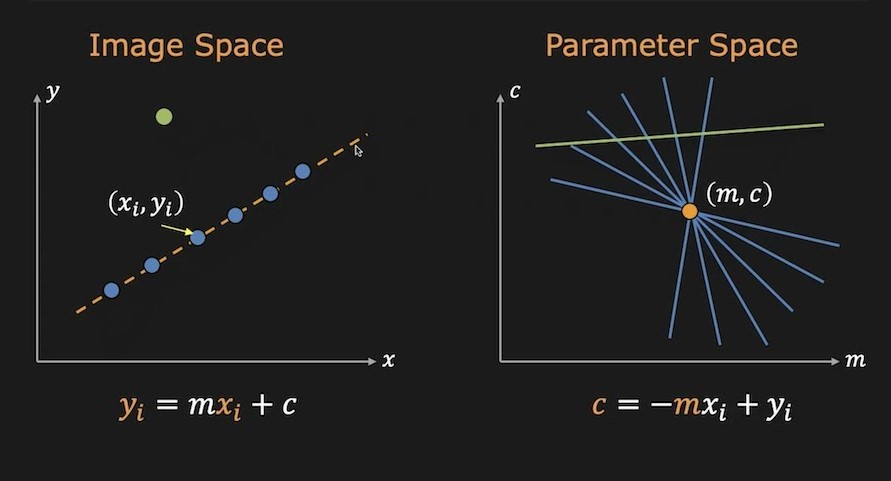

## Import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Image

In [2]:
image =  cv2.imread("./Images/Line_detect_image.png")

### Display the image

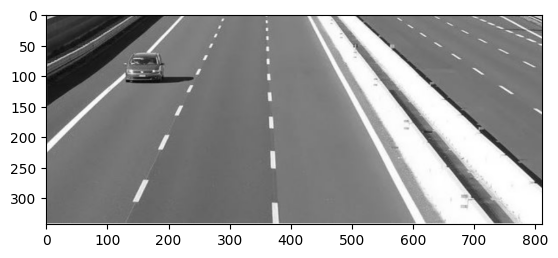

In [4]:
plt.imshow(image)
plt.show()

### Convert to Gray Image

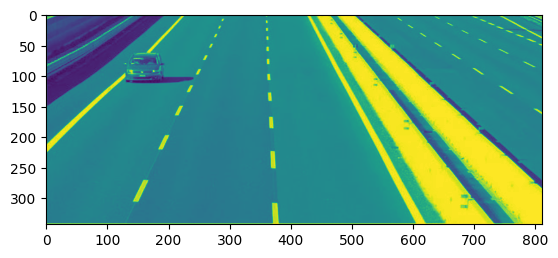

In [3]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

### Blur the image

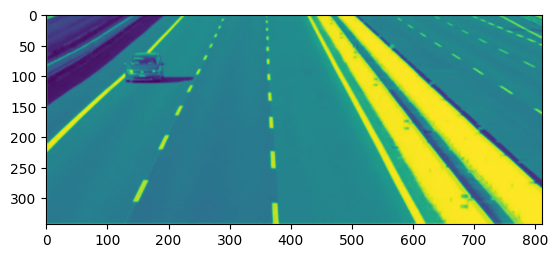

In [4]:
# Additional step (not complusolry)
kernel_size = 5
blur_gray = cv2.GaussianBlur(img,(kernel_size, kernel_size),0)
plt.imshow(blur_gray)
plt.show()

### Apply Canny filter on the Gray-Images

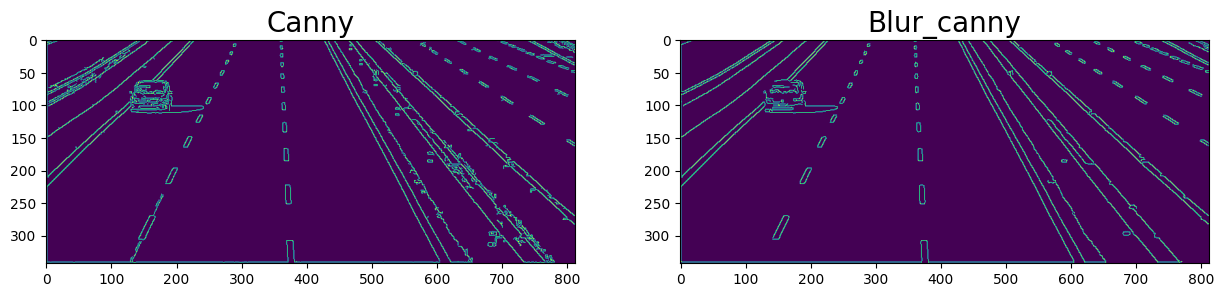

In [5]:
rows = 1
cols = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

img_can = cv2.Canny(img, 50, 200,apertureSize=3)
axes[0].imshow(img_can)
axes[0].set_title(f"Canny",fontsize = 20)

img_blur_can = cv2.Canny(blur_gray, 50, 200,apertureSize=3)
axes[1].imshow(img_blur_can)
axes[1].set_title(f"Blur_canny",fontsize = 20)

# fig.tight_layout()
plt.show()

We can see that blur images have less point-size-edges (i.e. less noise on the image)

### Setting the paramters for HoughLine method

In [24]:
rho = 1                 # distance resolution in pixels of the Hough grid
theta = np.pi / 180     # angular resolution in radians of the Hough grid
threshold = 40          # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10    # minimum number of pixels making up a line
max_line_gap = 250      # maximum gap in pixels between connectable line segments

#### Finding lines on blur image by HoughLinesP method

In [25]:
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(img_blur_can, rho, theta, threshold,minLineLength= min_line_length, maxLineGap= max_line_gap)

image_1 = image.copy()

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image_1,(x1,y1),(x2,y2),(255,0,0),1)

#### Finding lines on non-blur image by HoughLinesP method

In [26]:
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(img_can, 
                        rho, theta, threshold,minLineLength= min_line_length, maxLineGap= max_line_gap)

image_2 = image.copy()

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image_2, (x1,y1), (x2,y2), (0,128,255), 2)

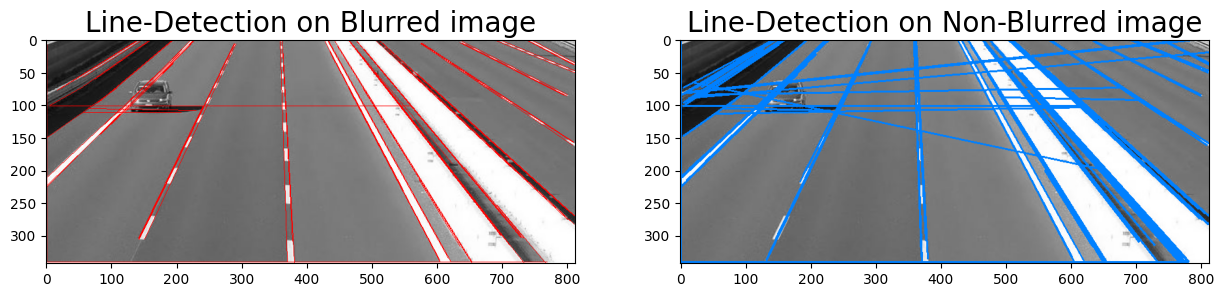

In [27]:
rows = 1
cols = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

axes[0].imshow(image_1)
axes[0].set_title(f"Line-Detection on Blurred image",fontsize = 20)

axes[1].imshow(image_2)
axes[1].set_title(f"Line-Detection on Non-Blurred image",fontsize = 20)

# fig.tight_layout()
plt.show()

It can be seen that Lines generted by blurred_canny_edge image is better in quality and less in numbers.

### Using basic HoughLine Method

In [13]:
lines = cv2.HoughLines(img_can, 1, np.pi/180, 200)

image_11 = image.copy()
 
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r* cosΘ - 1000 * sinΘ)
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sinΘ + 1000 * cosΘ)
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cosΘ + 1000 * sinΘ)
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sinΘ - 1000 * cosΘ)
    y2 = int(y0 - 1000 * (a))

    cv2.line(image_11, (x1, y1), (x2, y2), (0, 0, 255), 2)

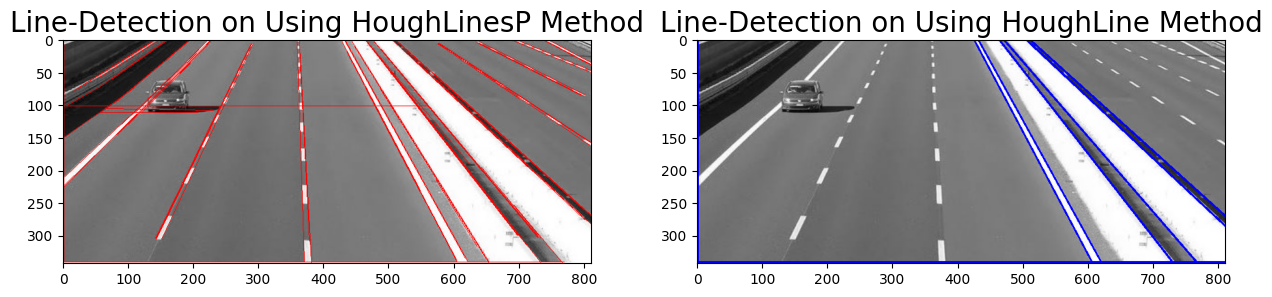

In [14]:
rows = 1
cols = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

axes[0].imshow(image_1)
axes[0].set_title(f"Line-Detection on Using HoughLinesP Method",fontsize = 20)

axes[1].imshow(image_11)
axes[1].set_title(f"Line-Detection on Using HoughLine Method",fontsize = 20)

# fig.tight_layout()
plt.show()